# Nanodegree Engenheiro de Machine Learning
## Projeto de Conclusão de Curso
## Project 5: Análise de padrões de rotas de veículos

## Introdução

Neste projeto será analisado o conjunto de dados de passagens de veículos por pontos de uma cidade. A base de dados contém a placa do veículo e a latitude e longitude do ponto de monitoramento. Esses dados se referem aos dias 14 e 15 de setembro de 2017. O objetivo deste projeto é identificar padrões de rotas de veículos, considerando para isso, a quantidade de vezes que cada veículo passou pelo ponto de controle em durante dois dias. 

**Política de privacidade e confidencialidade das informações**

Para que não seja infligida a privacidade dos donos dos veículos e a confidencialidade dos dados, tanto as placas quanto os dados dos pontos de controle foram cifrados para que se tornassem ininteligíveis. 

## Preparação dos dados
Aqui serão importados os dados e preparada a tabela de pontos por características (placa por locais).

In [5]:
# Bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregamento do conjunto de dados dos veículos
try:
    data_csv = pd.read_csv("veiculos_14e15set_trans.csv")
    print "Base de dados contém {} passagens com {} características cada.".format(*data_csv.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 2455348 passagens com 5 características cada.


- Verificando quais colunas foram importadas, a coluna 'count' conta quantas vezes o veículo passou no ponto; 
- Removendo linhas que contenham latitude igual a zero, pois trata-se de um erro nos dados;
- Verificando quantas linhas e colunas possui a base de dados

In [6]:
display(data_csv.columns)
data_csv.drop(data_csv.loc_latitude == 0, inplace=True)
print data_csv.shape

Index([u'Unnamed: 0', u'loc_placa', u'loc_latitude', u'loc_longitude',
       u'count'],
      dtype='object')

(2455346, 5)


Concatenando as colunas latitude e longitude em apenas uma coluna denominada "local":

In [7]:
data_csv['local'] = data_csv['loc_latitude'].map(str) + " " + data_csv['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos = set(data_csv['loc_placa'])
lista_locais = set(data_csv['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos), len(lista_locais))

Foram encontrados 618757 veículos passando por 135 pontos.


In [8]:
#indexa o DataFrame pelo campo 'loc_placa'
data_csv.set_index(['loc_placa'], inplace = True)
display(data_csv.head(n=5))

,Unnamed: 0,count,local
loc_placa,,,
OTS5855,4,1,1412 9134
APS9101,5,1,5825 9794
HRN6599,6,2,9222 5020
OFI2494,7,1,2324 8727
PAM3495,8,1,3444 967


O próximo passo é criar uma tabela em que cada linha contenha um veículo e cada coluna a latitude e longitude de um ponto de controle.

In [9]:
def create_df_placaporpontos(data_csv, placa_column, local_column):
    lista_veiculos = set(data_csv.index)
    lista_locais = set(data_csv[local_column])
    data = pd.DataFrame(index = lista_veiculos, columns = lista_locais)
    data.fillna(0, inplace=True)
    for local in lista_locais:
        data_temp = pd.DataFrame(data_csv[data_csv[local_column] == local])
        data[local]=data[local].add(data_temp['count'], fill_value = 0)
    return data

In [10]:
data = create_df_placaporpontos(data_csv, 'loc_placa', 'local')
print "tabela criada com sucesso"

tabela criada com sucesso


Salvando o dataframe em arquivo:

In [11]:
try:
    data.to_csv('placas_por_pontos_geral.csv')
    print "arquivo salvo com sucesso"
except:
    print "erro ao salvar arquivo"

arquivo salvo com sucesso


### Apresentando a tabela
A tabela abaixo é a tabela que será utilizada para desenvolvimento do projeto, cada linha contém um veículo e em cada coluna a quantidade de vezes que o veículo passou por cada ponto de controle, as colunas serão tratadas como características de cada veículo. 

In [12]:
display(data.head(n=10))

,5613 8278,4738 6727,4332 2860,8053 4258,3444 967,1412 9134,5880 8554,2833 1278,3416 1233,2374 6763,...,5000 4778,4162 7589,472 5552,1382 4248,4853 8470,9430 4736,5303 7658,7723 5667,9666 833,7272 1070
HXX6311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OES0945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HWC4722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HXX6312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
NMQ8671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NTM2610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODI1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OES0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NTQ9976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODI1161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
display(data.describe())

,5613 8278,4738 6727,4332 2860,8053 4258,3444 967,1412 9134,5880 8554,2833 1278,3416 1233,2374 6763,...,5000 4778,4162 7589,472 5552,1382 4248,4853 8470,9430 4736,5303 7658,7723 5667,9666 833,7272 1070
count,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.00000,618757.000000,...,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000,618757.000000
mean,0.006311,0.052074,0.014161,0.034257,0.080246,0.025758,0.033116,0.040683,0.02160,0.017370,...,0.040292,0.034631,0.063458,0.036882,0.042560,0.024396,0.053027,0.046273,0.039922,0.074368
std,0.095645,0.474153,0.148592,0.285901,0.814628,0.184976,0.231416,0.244743,0.17967,0.173292,...,0.276702,0.238282,0.386831,0.307453,0.643333,0.215558,0.313068,0.261491,0.517614,0.376809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,295.000000,21.000000,39.000000,578.000000,22.000000,77.000000,12.000000,10.00000,18.000000,...,28.000000,20.000000,192.000000,23.000000,468.000000,89.000000,28.000000,11.000000,353.000000,61.000000


### Implementação: PCA

Como existem 135 características, será utilizado o PCA para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

In [13]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(data)
print "Array com a variança explicada acumulada:"
np.cumsum(pca.explained_variance_ratio_)


Array com a variança explicada acumulada:


array([ 0.47496722,  0.5282771 ,  0.56556268,  0.58944722,  0.60864399,
        0.62347305,  0.6367917 ,  0.6495455 ,  0.6614776 ,  0.67194518,
        0.68173065,  0.69093634,  0.69981429,  0.70845335,  0.71694794,
        0.72514717,  0.73278846,  0.73972076,  0.74618363,  0.7523047 ,
        0.75804414,  0.76323468,  0.76816307,  0.77302439,  0.77775767,
        0.7824506 ,  0.78707657,  0.79152583,  0.795796  ,  0.80001089,
        0.80418064,  0.80821961,  0.81213045,  0.81596564,  0.8195659 ,
        0.82312573,  0.82652849,  0.82985814,  0.83316722,  0.83646088,
        0.8397158 ,  0.8429366 ,  0.84612868,  0.84927364,  0.85229472,
        0.85525715,  0.85821062,  0.86108085,  0.8638937 ,  0.86665064])

### Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

Pelo Array de variança explicada pode-se ver que com 30 dimensões 80% da variança dos dados é explicada, portanto será utilizada a redução de dimensionalidade pelo PCA de **135** para **30** dimensões

In [14]:
# Ajustanto o PCA com 30 dimensões
pca = PCA(n_components = 30)
pca.fit(data)

# Transformando os dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(data)

# Criando o DataFrame para os dados reduzidos
pca_dimensions = list()
for x in range(30):
    pca_dimensions.append("Dimension " + str(x))
reduced_data = pd.DataFrame(reduced_data, columns = pca_dimensions)

In [15]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(reduced_data[0:10])

,Dimension 0,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,...,Dimension 20,Dimension 21,Dimension 22,Dimension 23,Dimension 24,Dimension 25,Dimension 26,Dimension 27,Dimension 28,Dimension 29
0,0.046368,0.786888,-0.231216,4.598301,-0.136285,-0.075529,0.118595,0.139840,0.878148,-0.123236,...,0.069740,-0.042303,-0.149248,0.483637,0.506710,-0.046629,0.178113,-0.203427,-0.064847,-0.044465
1,-0.322102,0.156673,-0.120399,-0.137727,0.020624,-0.084764,0.064322,-0.039915,-0.026245,-0.013298,...,0.081741,-0.026192,-0.040306,0.105587,0.017631,-0.095319,0.004551,0.093276,0.085279,0.069063
2,-0.338625,0.148377,-0.077649,-0.134405,0.047846,-0.182347,-0.007667,-0.045173,-0.059510,-0.050704,...,0.042242,-0.003162,-0.060399,-0.026337,0.048483,0.003257,-0.031907,0.128212,0.051673,-0.008626
3,0.028331,0.476897,-0.257952,-0.074680,-0.051795,-0.500693,-0.159460,0.087375,0.088301,0.201072,...,-0.747967,-0.062795,0.133393,-0.001448,0.014829,0.220493,0.517379,0.032667,-0.001708,-0.101146
4,-0.334127,0.142917,-0.038638,-0.115698,0.092089,-0.206111,-0.057320,-0.052802,-0.084854,0.044623,...,0.323982,0.094643,0.045124,-0.352466,0.053035,0.127221,0.009173,-0.003378,-0.082074,-0.049718
5,-0.117623,0.377637,-0.194716,-0.184875,-0.087093,0.403258,-0.572386,-0.026354,-0.118713,0.003709,...,-0.039017,0.068865,0.763764,0.131357,0.248175,-0.308051,-0.121162,-0.017199,0.072447,-0.210354
6,-0.290270,0.184811,-0.132351,-0.052202,0.031169,-0.245061,-0.009563,-0.005548,0.119785,-0.069459,...,0.066595,0.025792,0.001381,0.045633,-0.024132,-0.035450,-0.063264,-0.014280,0.008729,-0.046865
7,-0.337188,0.125138,-0.093541,-0.127864,0.071954,-0.205098,-0.012350,-0.043688,-0.061082,-0.047946,...,0.012575,0.034621,-0.000917,-0.060980,0.033476,-0.000603,-0.029864,0.008386,-0.025273,-0.008386
8,-0.339927,0.158331,-0.108719,0.250199,0.048929,-0.181107,0.006551,-0.067565,-0.150016,-0.059046,...,0.091440,0.018461,0.045694,-0.075352,-0.108523,-0.029620,-0.007448,-0.014940,0.006914,0.037729
9,-0.331822,0.138421,0.044811,-0.137309,0.061707,-0.173676,-0.012732,-0.031304,-0.081576,0.055454,...,-0.055699,0.146798,-0.055632,-0.765462,0.486719,0.266821,-0.077770,0.017070,-0.160000,-0.206387


## Clustering

Nesta seção, os dados serão clusterizados para que sejam definidos grupos com comportamentos em comum. Será utilizado o algoritmo de clustering K-Means. 

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def make_clusterer(data, number_of_clusters): #função que cria um clusterer e o retorna treinado
    
    clusterer_test = KMeans(n_clusters=number_of_clusters) #Algorítimo de clusters escolhido: KMeans
    clusterer_test.fit(data)
    return clusterer_test

# Clusterizando os dados reduzidos em 30 clusters
clusterer = make_clusterer(reduced_data, 30) 
        
# Prevendo o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

### Visualização de Cluster
Os dados foram clusterizados com 30 dimensões, portanto não há como plotar um gráfico de dispersão com 30 dimensões. Uma forma de se ter uma idéia de como os pontos estão distribuídos entre os segmentos é um gráfico de barras em que cada barra representa a frequência dos pontos para cada segmento.

Como a frequência entre os segmentos tem valores discrepantes umas das outras, para melhor visualização do gráfico será utilizada uma escala logarítimica.

In [170]:
def plot_bar_graph(dados, labels, cor="blue", x_label = " ", y_label = " ", title = " "): #função que traça o gráfico de barra
    import matplotlib.pyplot as plt
    width = 1/1.5
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.bar(labels, dados, width, color=cor)
    return None

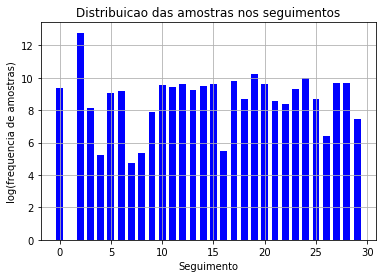

In [175]:
labels = clusterer.labels_
x_labels =  np.arange(0, (1+labels.max()))
freq_labels = np.bincount(labels)
log_freq = np.log(freq_labels)
plot_bar_graph(log_freq, x_labels, x_label = "Seguimento", y_label = "log(frequencia de amostras)", title = "Distribuicao das amostras nos seguimentos")

In [172]:
print np.arange(0, labels.max())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


### Análise dos segmentos obtidos
O gráfico acima representa trinta padrões de comportamentos de veículos durante dois dias. A partir desse ponto, pode-se usar os segmentos para verificar veículos que se comportam de forma parecida. 

Um segundo conjunto de dados contém veículos com restrições de envolvimento em crimes, como roubo/furto, clonados e proprietários com passagem na polícia. Esse segundo conjunto de dados são dos dias 21 e 22 de setembro de 2017, também uma Quinta e Sexta-feria, porém em dias diferentes do primeiro conjunto de dados. 

In [242]:
try:
    data_csv2 = pd.read_csv("veiculos_restricao_21e22set_trans.csv")
    
    print "Base de dados contém {} passagens com {} características cada.".format(*data_csv.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 2455346 passagens com 3 características cada.


In [24]:
print data_csv2.columns

Index([u'Unnamed: 0', u'placa', u'codocorrencia', u'loc_latitude',
       u'loc_longitude', u'count'],
      dtype='object')


In [25]:
data_csv2['local'] = data_csv2['loc_latitude'].map(str) + " " + data_csv2['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv2.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos = set(data_csv2['placa'])
lista_locais = set(data_csv2['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos), len(lista_locais))

Foram encontrados 2377 veículos passando por 198 pontos.


In [26]:
#Criação de tabela prévia para receber os dados de veículos por locais
data_restricao_prev = create_df_placaporpontos(data_csv2, 'placa', 'local')

In [27]:
#Cria nova tabela data_restricao, indexa pela placa e colunas igual às dos dados de veículos geral, 
#é somada a data_restricao_prev

data_restricao = pd.DataFrame(index = data_restricao_prev.index, columns = data.columns) 
data_restricao.fillna(0, inplace = True)
data_restricao = data_restricao.add(data_restricao_prev, fill_value = 0)

Este segundo conjunto de dados contem 198 pontos de controle de veículo, porém para comparar a rota desses veículos com os padrões ja definidos anteriormente, serão considerados somente os 135 pontos de controle utilizados antecoriormente.

O bloco abaixo faz esse ajuste de características.

In [28]:
data_restricao_locais_treinados = pd.DataFrame()
lista_locais_treinados = set(data_csv['local'])
for loc in lista_locais_treinados:
    data_restricao_locais_treinados[loc] = data_restricao[loc]
data_restricao_locais_treinados.fillna(0, inplace = True)
print data_restricao_locais_treinados.shape

(3802, 135)


Transformando as dimensões de data_restrição_locais_treinados nas dimensões PCA

In [68]:
data_restricao_pca = pca.transform(data_restricao_locais_treinados) #aplica PCA
data_restricao_pca = pd.DataFrame(data_restricao_pca, columns = pca_dimensions) #coloca os dados em um DataFrame
data_restricao_pred = clusterer.predict(data_restricao_pca) #predição dos dados nos clusteres treinados
print data_restricao_pred
freq_restricao = np.bincount(data_restricao_pred) #distribuição de frequência de cada cluster para veículos com restrição
print freq_restricao
log_freq_restricao = np.log(freq_restricao)

[2 2 2 ..., 2 2 2]
[   2    0 3589    0    0    0    0    0    0    0    3    3    5    1   11
    2    0    3    1   84   40    0    0    3   39    0    0    6   10]


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


### Comparando os dados
Agora que os veículos com restrição foram divididos nos seguimentos de veículos calculados anteriormente, será verificado como eles se distribuem nos seguimentos.
Em azul será plotado os veículos em geral, em vermelho os veículos com restrição. É importante lembrar que a escala utilizada com o gráfico não é decimal, e sim logarítimica.

In [205]:
def plot_thwo_bars_graph(a, b, x_label = "", y_label = "", title = ""):
    import numpy as np
    import matplotlib.pyplot as plt

    x_a = range(len(a))
    x_b = range(len(b))
    width = 1/1.5
    fig, ax = plt.subplots()
    rect_a = ax.bar(x_a, a, width, color='b')
    rect_b = ax.bar(x_b, b, width, color='r')
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return None

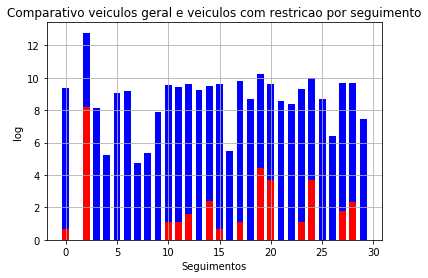

In [207]:
plot_thwo_bars_graph(log_freq, log_freq_restricao, title = "Comparativo veiculos geral e veiculos com restricao por seguimento", y_label = "log", x_label = "Seguimentos")

In [69]:
# verificando o tamanho de cada array
print freq_restricao.shape
print freq_labels.shape

(29L,)
(30L,)


### Calculando a taxa de veículos com restrição em cada seguimento

Será calculado a porcentagem da frequência dos veículos com restrição com relação aos veículos gerais.

O array freq_restricao tem uma unidade a menos porque não foi classificado nenhum veículo no último seguimento, para que seja calculada a taxa será acrecentado um zero na sua última posição.

In [74]:
a = freq_labels.shape[0]-freq_restricao.shape[0]
freq_restricao = np.append(freq_restricao, np.zeros(a))

In [75]:
x=freq_restricao.astype(float)
restricao_ratio=np.divide(x,freq_labels)

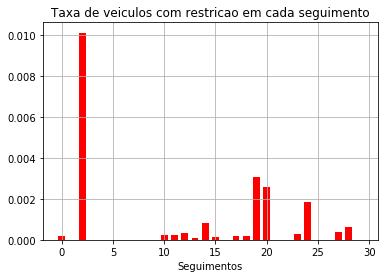

In [178]:
plot_bar_graph(restricao_ratio, x_labels, cor='red', x_label = "Seguimentos", y_label = "", title = "Taxa de veiculos com restricao em cada seguimento")

In [77]:
np.max(restricao_ratio)

0.010128547037491709

In [215]:
def find_best_number_of_clusters(data, data_target, range_of_clusters):
    
    max_ratio_per_n_cluster = pd.DataFrame(index=range_of_clusters, columns = ['max_ratio'])
    max_ratio = 0

    for test_n_cluster in range_of_clusters:
        clusterer = make_clusterer(data, test_n_cluster) #clusterização
        labels = clusterer.labels_
        freq_labels = np.bincount(labels)
        
        data_target_pred = clusterer.predict(data_target) #predição dos dados alvo nos clusteres treinados
        freq_target = np.bincount(data_target_pred) #distribuição de frequência por clusters dos dados alvo
        
        a = freq_labels.shape[0]-freq_target.shape[0]
        freq_target = np.append(freq_target, np.zeros(a))
        
        x=freq_target.astype(float)
        target_ratio=np.divide(x,freq_labels)
        
        max_ratio_per_n_cluster['max_ratio'].loc[test_n_cluster] = np.max(target_ratio)
        if max_ratio < max_ratio_per_n_cluster['max_ratio'].loc[test_n_cluster]:
            best_clusterer = clusterer
            max_ratio = max_ratio_per_n_cluster['max_ratio'].loc[test_n_cluster]
    
    return (max_ratio_per_n_cluster, best_clusterer)

In [108]:
range_of_clusters = np.arange(9,41)
max_ratio_per_n_cluster = find_best_number_of_clusters(reduced_data, data_restricao_pca, range_of_clusters)

Melhor ajuste encontrado foi com 38 clusters, que atingiu uma taxa maxima de 0.0109.


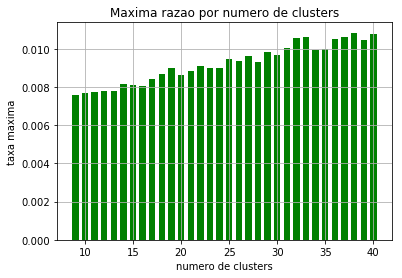

In [209]:
plot_bar_graph(max_ratio_per_n_cluster['max_ratio'], range_of_clusters, cor='green', x_label = "numero de clusters", y_label = "taxa maxima", title = "Maxima razao por numero de clusters")
best_n_cluster = max_ratio_per_n_cluster['max_ratio'].idxmax()
print "Melhor ajuste encontrado foi com {} clusters, que atingiu uma taxa maxima de {:.4f}." .format(best_n_cluster, max_ratio_per_n_cluster['max_ratio'].loc[best_n_cluster])

In [112]:
range_of_clusters2 = np.arange(40,81)
max_ratio_per_n_cluster2 = find_best_number_of_clusters(reduced_data, data_restricao_pca, range_of_clusters2)

Melhor ajuste encontrado foi com 74 clusters, que atingiu uma taxa maxima de 0.0135.


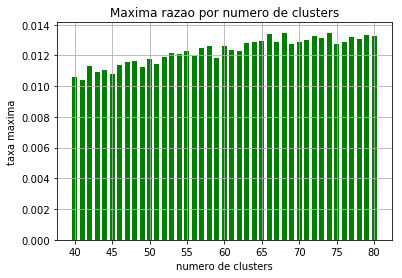

In [210]:
plot_bar_graph(max_ratio_per_n_cluster2['max_ratio'], range_of_clusters2, cor='green', x_label = "numero de clusters", y_label = "taxa maxima", title = "Maxima razao por numero de clusters")
best_n_cluster = max_ratio_per_n_cluster2['max_ratio'].idxmax()
print "Melhor ajuste encontrado foi com {} clusters, que atingiu uma taxa maxima de {:.4f}." .format(best_n_cluster, max_ratio_per_n_cluster2['max_ratio'].loc[best_n_cluster])

In [220]:
range_of_clusters4 = np.arange(100,111)
(max_ratio_per_n_cluster4, best_clusterer) = find_best_number_of_clusters(reduced_data, data_restricao_pca, range_of_clusters4)

Melhor ajuste encontrado foi com 101 clusters, que atingiu uma taxa maxima de 0.0312.


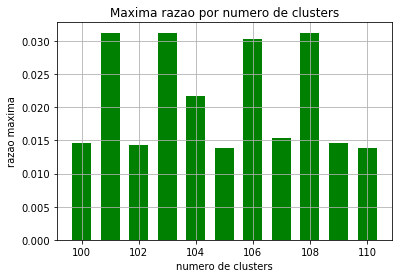

In [221]:
plot_bar_graph(max_ratio_per_n_cluster4['max_ratio'], range_of_clusters4, cor='green', x_label = "numero de clusters", y_label = "razao maxima", title = "Maxima razao por numero de clusters")
best_n_cluster = max_ratio_per_n_cluster4['max_ratio'].idxmax()
print "Melhor ajuste encontrado foi com {} clusters, que atingiu uma taxa maxima de {:.4f}." .format(best_n_cluster, max_ratio_per_n_cluster4['max_ratio'].loc[best_n_cluster])

In [119]:
range_of_clusters3 = np.arange(111,121)
max_ratio_per_n_cluster3 = find_best_number_of_clusters(reduced_data, data_restricao_pca, range_of_clusters3)

Melhor ajuste encontrado foi com 119 clusters, que atingiu uma taxa maxima de 0.0323.


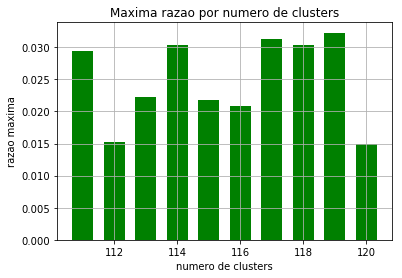

In [213]:
plot_bar_graph(max_ratio_per_n_cluster3['max_ratio'], range_of_clusters3, cor='green', x_label = "numero de clusters", y_label = "razao maxima", title = "Maxima razao por numero de clusters")
best_n_cluster = max_ratio_per_n_cluster3['max_ratio'].idxmax()
print "Melhor ajuste encontrado foi com {} clusters, que atingiu uma taxa maxima de {:.4f}." .format(best_n_cluster, max_ratio_per_n_cluster3['max_ratio'].loc[best_n_cluster])

In [223]:
range_of_clusters5 = np.arange(121,131)
(max_ratio_per_n_cluster5, best_clusterer5) = find_best_number_of_clusters(reduced_data, data_restricao_pca, range_of_clusters5)

Melhor ajuste encontrado foi com 128 clusters, que atingiu uma taxa maxima de 0.0357.


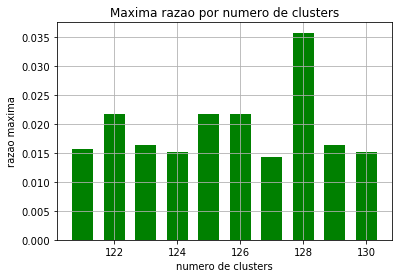

In [224]:
plot_bar_graph(max_ratio_per_n_cluster5['max_ratio'], range_of_clusters5, cor='green', x_label = "numero de clusters", y_label = "razao maxima", title = "Maxima razao por numero de clusters")
best_n_cluster = max_ratio_per_n_cluster5['max_ratio'].idxmax()
print "Melhor ajuste encontrado foi com {} clusters, que atingiu uma taxa maxima de {:.4f}." .format(best_n_cluster, max_ratio_per_n_cluster5['max_ratio'].loc[best_n_cluster])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


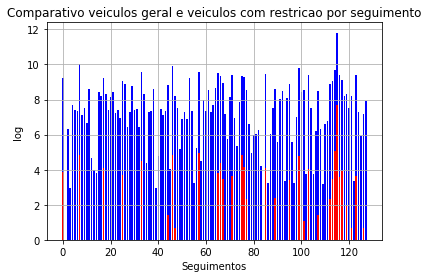

In [272]:
#Melhor clusterer: best_clusterer
best_labels = best_clusterer5.labels_
best_freq_labels = np.bincount(best_labels)
        
best_data_restricao_pred = best_clusterer5.predict(data_restricao_pca) #predição dos dados alvo nos clusteres treinados
best_freq_restricao = np.bincount(best_data_restricao_pred) #distribuição de frequência por clusters dos dados alvo
        
a = best_freq_labels.shape[0] - best_freq_restricao.shape[0]
best_freq_restricao = np.append(best_freq_restricao, np.zeros(a))

best_restricao_ratio=np.divide(best_freq_restricao.astype(float),best_freq_labels)

log_best_freq = np.log(best_freq_labels)
log_best_freq_restricao = np.log(best_freq_restricao)

x_best_labels =  np.arange(0, (1+best_labels.max()))

plot_thwo_bars_graph(log_best_freq, log_best_freq_restricao, title = "Comparativo veiculos geral e veiculos com restricao por seguimento", y_label = "log", x_label = "Seguimentos")

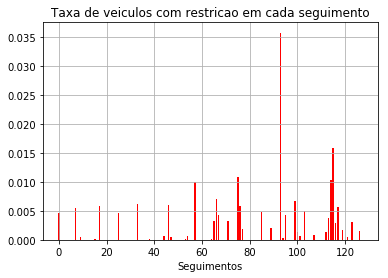

In [273]:
plot_bar_graph(best_restricao_ratio, x_best_labels, cor='red', x_label = "Seguimentos", y_label = "", title = "Taxa de veiculos com restricao em cada seguimento")

In [270]:
print "O Sequimento {} é o seguimento com maior taxa de veículos com restricao, {:.4f}" .format(np.argmax(best_restricao_ratio), np.max(best_restricao_ratio))

O Sequimento 93 é o seguimento com maior taxa de veículos com restricao, 0.0357


### Validação

In [248]:
try:
    data_csv3 = pd.read_csv("veiculosrestricao12e13out_trans.csv")
    
    print "Base de dados contém {} passagens com {} características cada.".format(*data_csv3.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing??"

Base de dados contém 3950 passagens com 6 características cada.


In [249]:
data_csv3['local'] = data_csv3['loc_latitude'].map(str) + " " + data_csv3['loc_longitude'].map(str) #cria coluna concatenando latitude e longitude
data_csv3.drop(['loc_latitude', 'loc_longitude'], axis = 1, inplace = True)
lista_veiculos_val = set(data_csv3['placa'])
lista_locais_val = set(data_csv3['local'])
print "Foram encontrados {} veículos passando por {} pontos." .format(len(lista_veiculos_val), len(lista_locais_val))

Foram encontrados 2458 veículos passando por 194 pontos.


In [250]:
#Criação de tabela prévia para receber os dados de veículos por locais
data_validacao_prev = create_df_placaporpontos(data_csv3, 'placa', 'local')

In [251]:
#Cria nova tabela data_validacao, indexa pela placa e colunas igual às dos dados de veículos geral, 
#é somada a data_restricao_prev

data_validacao = pd.DataFrame(index = data_validacao_prev.index, columns = data.columns) 
data_validacao.fillna(0, inplace = True)
data_validacao = data_validacao.add(data_validacao_prev, fill_value = 0)

In [252]:
data_validacao_locais_treinados = pd.DataFrame()
lista_locais_treinados = set(data_csv['local'])
for loc in lista_locais_treinados:
    data_validacao_locais_treinados[loc] = data_validacao[loc]
data_validacao_locais_treinados.fillna(0, inplace = True)
print data_validacao_locais_treinados.shape

(3950, 135)


Aplicação de PCA nos dados de validação, predição nos clusteres e calculando a frequencia em cada cluster

In [253]:
data_validacao_pca = pca.transform(data_validacao_locais_treinados) #aplica PCA
data_validacao_pca = pd.DataFrame(data_validacao_pca, columns = pca_dimensions) #coloca os dados em um DataFrame

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


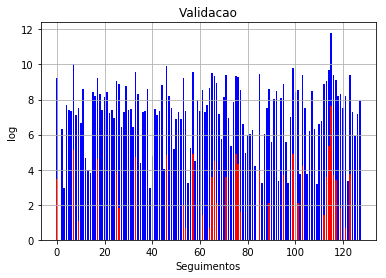

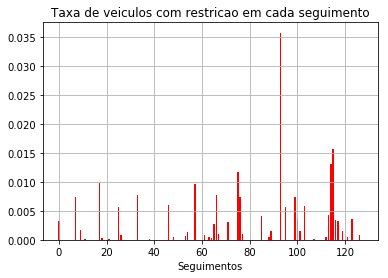

In [263]:
data_validacao_pred = best_clusterer5.predict(data_validacao_pca) #predição dos dados alvo nos clusteres treinados
freq_validacao = np.bincount(data_validacao_pred) #distribuição de frequência por clusters dos dados alvo
        
a = best_freq_labels.shape[0] - freq_validacao.shape[0]
freq_validacao = np.append(freq_validacao, np.zeros(a))

validacao_ratio=np.divide(freq_validacao.astype(float),best_freq_labels)

log_best_freq = np.log(best_freq_labels)
log_freq_validacao = np.log(freq_validacao)

x_best_labels =  np.arange(0, (1+best_labels.max()))

plot_thwo_bars_graph(log_best_freq, log_freq_validacao, title = "Validacao", y_label = "log", x_label = "Seguimentos")
plot_bar_graph(validacao_ratio, x_best_labels, cor='red', x_label = "Seguimentos", y_label = "", title = "Taxa de veiculos com restricao em cada seguimento")

In [279]:
print "{:.4f} {}" .format(np.argmax(freq_validacao), np.max(freq_validacao))
print "{:.4f} {}" .format(np.argmax(best_freq_restricao), np.max(best_freq_restricao))
print "{:.4f}" .format(best_freq_labels[93])

115.0000 2109.0
115.0000 2134.0
28.0000


In [264]:
print "O Sequimento {} é o seguimento com maior taxa de veículos com restricao, {:.4f}" .format(np.argmax(validacao_ratio), np.max(validacao_ratio))

O Sequimento 93 é o seguimento com maior taxa de veículos com restricao, 0.0357


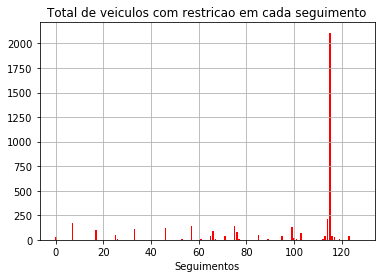

In [283]:
plot_bar_graph(freq_validacao, x_best_labels, cor='red', x_label = "Seguimentos", y_label = "", title = "Total de veiculos com restricao em cada seguimento")

In [285]:
print "O Sequimento {} possui {:.0f} veículos com restricao." .format(np.argmax(freq_validacao), np.max(freq_validacao))

O Sequimento 115 possui 2109 veículos com restricao.
